In [1]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 📂 Load Dataset
df = pd.read_csv('FakeNewsNet.csv.csv')  # Ensure the file is in the same folder
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (23196, 5)


,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [4]:
print(df.columns)



Index(['title', 'news_url', 'source_domain', 'tweet_num', 'real'], dtype='object')


In [5]:
# 🧹 Preprocessing
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

# ✅ Rename columns for clarity
df = df.rename(columns={'title': 'text', 'real': 'label'})

# Clean the text
df['text'] = df['text'].apply(clean_text)

# Drop rows with missing values
df.dropna(inplace=True)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
# TF-IDF conversion
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['text'])
y = df['label']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [10]:
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8375601224311325

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.42      0.56      1105
           1       0.84      0.97      0.90      3469

    accuracy                           0.84      4574
   macro avg       0.83      0.70      0.73      4574
weighted avg       0.83      0.84      0.82      4574



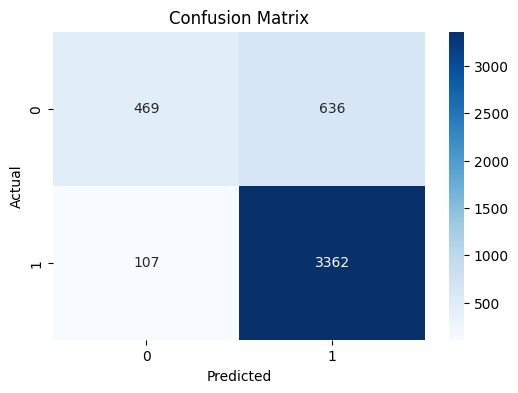

In [11]:
# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [12]:
def predict_news(news_text):
    cleaned = clean_text(news_text)
    transformed = vectorizer.transform([cleaned])
    prediction = model.predict(transformed)[0]
    return "REAL" if prediction == 1 else "FAKE"

# Test it:
print(predict_news("Breaking: Government announces new AI policy for startups"))


REAL


In [14]:
def predict_news(news_text):
    cleaned = clean_text(news_text)
    transformed = vectorizer.transform([cleaned])
    prediction = model.predict(transformed)[0]
    return "FAKE" if prediction == 1 else "REAL"

# Test it:
print(predict_news("Breaking: Government announces free education"))


FAKE
